In [1]:
import pandas as pd
import numpy as np
import pylab as pl

from llckbdm.llckbdm import _cluster_line_lists,_transform_line_lists, llc_kbdm
from llckbdm.sampling import filter_samples
from llckbdm.min_rmse_kbdm import min_rmse_kbdm
from llckbdm.sig_gen import multi_fid, gen_t_freq_arrays

In [2]:
columns = ['amplitude', 't2', 'frequency', 'phase']

df = pd.read_csv(
    'data/params_brain_sim_1_5T.csv',
    names=columns
)

In [3]:
dwell = 5e-4
N = 2048
params = df.as_matrix()

t_array, freq_array = gen_t_freq_arrays(N, dwell)

data_raw = multi_fid(t_array, params)

In [4]:
df = df.sort_values(['frequency'])
df['gamma'] = 1/df['t2']
df['phase_deg'] = df['phase'] * 180 / np.pi
df

,amplitude,t2,frequency,phase,gamma,phase_deg
15,1.000000,0.002713,75.31704,0,368.599998,0.0
14,0.116110,0.013850,160.06464,0,72.200000,0.0
13,0.291727,0.019920,246.46896,0,50.200000,0.0
12,0.428882,0.073529,255.51720,0,13.600000,0.0
11,0.029028,0.006649,268.89840,0,150.399999,0.0
10,0.018432,0.090909,269.53560,0,11.000000,0.0
9,0.045080,0.083333,290.43576,0,12.000000,0.0
8,0.042729,0.116279,299.99376,0,8.600000,0.0
7,0.202612,0.092593,386.78040,0,10.800000,0.0
6,0.077779,0.113636,410.22936,0,8.800000,0.0


/home/danilo/miniconda3/envs/llckbdm/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


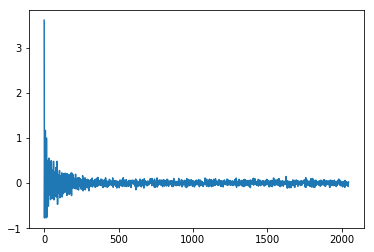

In [5]:
%matplotlib inline
noise = 0.04 * (np.random.randn(N) + 1j * np.random.randn(N))

data = data_raw + noise
pl.plot(data)
pl.show()

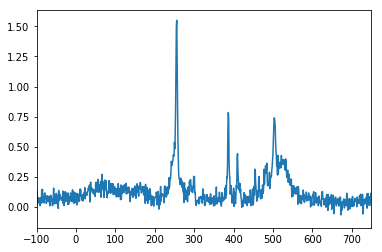

In [6]:
data_fft = np.fft.fftshift(np.fft.fft(data)) / np.sqrt(N)
data_fft_raw = np.fft.fftshift(np.fft.fft(data_raw)) / np.sqrt(N)
pl.plot(freq_array, data_fft.real)

pl.xlim(-100, 750)
pl.show()

In [7]:
m_range = range(200, 500, 1)
llc_params_est, min_rmse = llc_kbdm(data, dwell, m_range, p=1, gep_solver='svd', l=30, q=0, min_samples=int(0.8 * len(m_range)))

computing for 30
computing for 31
computing for 32
computing for 33
computing for 34
computing for 35
computing for 36
computing for 37
computing for 38
computing for 39
computing for 40
computing for 41
computing for 42
computing for 43
computing for 44
computing for 45
computing for 46
computing for 47
computing for 48
computing for 49
computing for 50
computing for 51
computing for 52
computing for 53
computing for 54
computing for 55
computing for 56
computing for 57
computing for 58
computing for 59
computing for 60
computing for 61
computing for 62
computing for 63
computing for 64
computing for 65
computing for 66
computing for 67
computing for 68
computing for 69
computing for 70
computing for 71
computing for 72
computing for 73
computing for 74
computing for 75
computing for 76
computing for 77
computing for 78
computing for 79
computing for 80
computing for 81
computing for 82
computing for 83
computing for 84
computing for 85
computing for 86
computing for 87
computing for 

TypeError: __init__() got an unexpected keyword argument 'line_list'

In [ ]:
df_est = pd.DataFrame(data=llc_params_est, columns=columns)
df_est['gamma'] = 1/df_est['t2']
df_est['phase_deg'] = df_est['phase'] * 180 / np.pi
df_est

In [ ]:
%matplotlib inline

params_est = df_est.as_matrix()[:,0:4]

data_est = multi_fid(t_array, params_est)
data_fft_est = np.fft.fftshift(np.fft.fft(data_est)) / np.sqrt(N)

# estimatated
pl.plot(freq_array, data_fft_est.real, 'black')

# noise
#pl.plot(freq_array, data_fft.real - data_fft_raw.real, 'green')

# raw
pl.plot(freq_array, data_fft_raw.real, 'green')

# raw diff
pl.plot(freq_array, data_fft_raw.real - data_fft_est.real, 'blue')

# rdata
pl.plot(freq_array, data_fft.real, 'red', alpha=0.1)

pl.xlim(-100, 750)

pl.show()
print(min_rmse)

In [ ]:
df_est

In [ ]:
min_rmse_params_est, min_rmse, min_index, rmses, samples = min_rmse_kbdm(data, dwell, m_range, l=30)

In [ ]:
%matplotlib inline
data_min_rmse = multi_fid(t_array, min_rmse_params_est)

data_min_rmse_fft = np.fft.fftshift(np.fft.fft(data_min_rmse)) / np.sqrt(N)
data_fft_raw = np.fft.fftshift(np.fft.fft(data_raw)) / np.sqrt(N)

pl.plot(freq_array, data_min_rmse_fft.real)
pl.plot(freq_array, data_fft_raw.real - data_min_rmse_fft.real)

pl.xlim(-100, 750)
pl.show()
print(min_rmse)